# Spike Challenge - Predicción de caudales extremos en Chile
### por Rafael Sacaan A.

El desafío se trata de predecir los caudales extremos para cuencas en Chile, en base a datasets obtenidos desde bases públicas y reales de estaciones meteorológicas.

## Preguntas

### Pregunta 1.

**Baja el archivo caudal_extra.csv. Puedes bajarlo de BigQuery (vean el código al final de este
documento), o bien, desde Github (https://github.com/SpikeLab-CL/desafio_spike_cuencas).**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random

%matplotlib inline

In [2]:
data_path = os.path.join(os.getcwd(), 'datasets', 'caudal_extra.csv')
data = pd.read_csv(data_path, delimiter = ',')
data.head()

,Unnamed: 0,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
0,0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06 00:00:00+00:00,0.812,4540001,Rio Grande En Paloma 1,0.0,NaN
1,1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27 00:00:00+00:00,0.236,4540001,Rio Grande En Paloma 1,0.0,NaN
2,2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07 00:00:00+00:00,0.730,4540001,Rio Grande En Paloma 1,0.0,NaN
3,3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30 00:00:00+00:00,3.590,4540001,Rio Grande En Paloma 1,0.0,NaN
4,4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22 00:00:00+00:00,1.370,4540001,Rio Grande En Paloma 1,0.0,NaN


### Pregunta 2.

**Analiza el dataset caudal_extra.csv. ¿Qué puedes decir de los datos, distribuciones, missing,
u otros? ¿Hay algo que te llame la atención? ¿Por qué hay tantos valores missing? Pensar en
la manera en que se elaboró el dataset, descrito más arriba. (Entregable: texto/imágenes)**

Revisamos el tipo de datos en el dataset (numéricos y categóricos).

In [3]:
data.dtypes

Unnamed: 0                  int64
codigo_estacion             int64
institucion                object
fuente                     object
nombre                     object
altura                      int64
latitud                   float64
longitud                  float64
codigo_cuenca               int64
nombre_sub_cuenca          object
cantidad_observaciones      int64
fecha                      object
caudal                    float64
gauge_id                    int64
gauge_name                 object
precip_promedio           float64
temp_max_promedio         float64
dtype: object

Convertimos la columna _fecha_ a tipo datetime.

In [4]:
data["fecha"] = pd.to_datetime(data.fecha)
data['fecha'] = data['fecha'].dt.tz_localize(None) # remover zona (es la misma en todo Chile continental)
data.dtypes

Unnamed: 0                         int64
codigo_estacion                    int64
institucion                       object
fuente                            object
nombre                            object
altura                             int64
latitud                          float64
longitud                         float64
codigo_cuenca                      int64
nombre_sub_cuenca                 object
cantidad_observaciones             int64
fecha                     datetime64[ns]
caudal                           float64
gauge_id                           int64
gauge_name                        object
precip_promedio                  float64
temp_max_promedio                float64
dtype: object

Chequeamos la dimensión del dataset.

In [5]:
print("Nro. columnas: {}. Nro. de filas: {}".format(data.shape[1], data.shape[0]))

Nro. columnas: 17. Nro. de filas: 1411180


Chequeamos columnas de clase numérica.

In [6]:
print("Num. columnas de clase numéricas: ",len(data.select_dtypes(include=[np.number]).columns))
data.select_dtypes(include=[np.number]).describe()

Num. columnas de clase numéricas:  11


,Unnamed: 0,codigo_estacion,altura,latitud,longitud,codigo_cuenca,cantidad_observaciones,caudal,gauge_id,precip_promedio,temp_max_promedio
count,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.383413e+06,1.259617e+06
mean,7.055895e+05,6.279953e+06,5.855691e+02,-3.367748e+01,-7.121826e+01,6.255881e+01,1.573983e+04,9.552229e+01,6.279953e+06,1.921009e+00,1.921110e+01
std,4.073727e+05,2.891695e+06,8.652682e+02,6.940820e+00,1.174363e+00,2.839921e+01,7.545197e+03,2.526337e+02,2.891695e+06,7.361936e+00,7.307081e+00
min,0.000000e+00,1.020003e+06,0.000000e+00,-5.404110e+01,-7.328330e+01,1.000000e+01,8.020000e+02,0.000000e+00,1.020003e+06,0.000000e+00,-1.905000e+01
25%,3.527948e+05,4.320001e+06,4.500000e+01,-3.721190e+01,-7.206810e+01,4.300000e+01,1.025500e+04,1.250000e+00,4.320001e+06,0.000000e+00,1.370000e+01
50%,7.055895e+05,5.734001e+06,3.950000e+02,-3.359390e+01,-7.125470e+01,5.700000e+01,1.488900e+04,8.950000e+00,5.734001e+06,0.000000e+00,1.908429e+01
75%,1.058384e+06,8.308000e+06,7.500000e+02,-2.994580e+01,-7.053280e+01,8.300000e+01,2.061100e+04,6.970000e+01,8.308000e+06,0.000000e+00,2.520000e+01
max,1.411179e+06,1.287600e+07,4.370000e+03,-1.823250e+01,-6.814390e+01,1.280000e+02,3.666700e+04,1.580500e+04,1.287600e+07,2.586000e+02,4.150000e+01


Chequeamos las columnas categóricas.

In [7]:
print("Num. columnas de clase categóricas: ", len(data.select_dtypes(include=['object']).columns))
data.select_dtypes(include=['object']).describe()

Num. columnas de clase categóricas:  5


,institucion,fuente,nombre,nombre_sub_cuenca,gauge_name
count,1411180,1411180,1411180,1411180,1411180
unique,1,1,133,78,133
top,DGA,dga_web,Rio Aconcagua En Chacabuquito,Rio Loa Alto (Bajo Junta Rio Salado),Rio Aconcagua En Chacabuquito
freq,1411180,1411180,20706,64164,20706


Chequeamos el número de estaciones de medición.

In [8]:
ids = data.codigo_estacion.unique()
print("Nro. de estaciones de medición: ", len(ids))

Nro. de estaciones de medición:  133


Podemos limpiar el dataset de columnas que no aportan información relevante al problema.

In [9]:
# chequear si estas columnas son iguales

print(sum(data.codigo_estacion.unique() == data.gauge_id.unique())) 
print(sum(data.codigo_estacion == data.gauge_id))

133
1411180


In [10]:
data.drop(columns=['gauge_id', 'Unnamed: 0', 'institucion', 'fuente','cantidad_observaciones'], inplace=True)

Revisamos el nuevo dataset.

In [11]:
data.shape

(1411180, 12)

In [12]:
data.select_dtypes(include=[np.number]).describe()

,codigo_estacion,altura,latitud,longitud,codigo_cuenca,caudal,precip_promedio,temp_max_promedio
count,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.411180e+06,1.383413e+06,1.259617e+06
mean,6.279953e+06,5.855691e+02,-3.367748e+01,-7.121826e+01,6.255881e+01,9.552229e+01,1.921009e+00,1.921110e+01
std,2.891695e+06,8.652682e+02,6.940820e+00,1.174363e+00,2.839921e+01,2.526337e+02,7.361936e+00,7.307081e+00
min,1.020003e+06,0.000000e+00,-5.404110e+01,-7.328330e+01,1.000000e+01,0.000000e+00,0.000000e+00,-1.905000e+01
25%,4.320001e+06,4.500000e+01,-3.721190e+01,-7.206810e+01,4.300000e+01,1.250000e+00,0.000000e+00,1.370000e+01
50%,5.734001e+06,3.950000e+02,-3.359390e+01,-7.125470e+01,5.700000e+01,8.950000e+00,0.000000e+00,1.908429e+01
75%,8.308000e+06,7.500000e+02,-2.994580e+01,-7.053280e+01,8.300000e+01,6.970000e+01,0.000000e+00,2.520000e+01
max,1.287600e+07,4.370000e+03,-1.823250e+01,-6.814390e+01,1.280000e+02,1.580500e+04,2.586000e+02,4.150000e+01


In [13]:
data.select_dtypes(include=['object']).describe()

,nombre,nombre_sub_cuenca,gauge_name
count,1411180,1411180,1411180
unique,133,78,133
top,Rio Aconcagua En Chacabuquito,Rio Loa Alto (Bajo Junta Rio Salado),Rio Aconcagua En Chacabuquito
freq,20706,64164,20706


Revisamos el total de datos y los datos _missing_.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411180 entries, 0 to 1411179
Data columns (total 12 columns):
codigo_estacion      1411180 non-null int64
nombre               1411180 non-null object
altura               1411180 non-null int64
latitud              1411180 non-null float64
longitud             1411180 non-null float64
codigo_cuenca        1411180 non-null int64
nombre_sub_cuenca    1411180 non-null object
fecha                1411180 non-null datetime64[ns]
caudal               1411180 non-null float64
gauge_name           1411180 non-null object
precip_promedio      1383413 non-null float64
temp_max_promedio    1259617 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 129.2+ MB


In [15]:
data.isna().sum()

codigo_estacion           0
nombre                    0
altura                    0
latitud                   0
longitud                  0
codigo_cuenca             0
nombre_sub_cuenca         0
fecha                     0
caudal                    0
gauge_name                0
precip_promedio       27767
temp_max_promedio    151563
dtype: int64

Podemos ver que faltan datos en las columnas **precip_promedio** y **temp_max_promedio** .

Por ejemplo, desde los exploradores climáticos online  podemos ver la medición de caudal en la estación número 11143001. Existen mediciones desde finales de los 80's hasta aprox. el año 2018.

<img src="img/p1-4.png">

Luego, en el polígono de cuenca aguas arriba de las estación se pueden encontrar estaciones que miden precipitación y temp. máxima. Vemos que los datos van desde el año 1981 aprox. hasta el año 2017 aprox., y que faltan mediciones (eg. alrededor del 2015). 

<img src="img/p1-1.png">

Luego, se pueden encontrar las siguientes mediciones de temperatura para la misma estación en el póligono de cuenca aguas arriba de las estación de medición. Vemos que hay mediciones desde el año 1990 aprox. hasta el 2013, en este caso, ininterrumpidamente.

<img src="img/p1-3.png">

Cuando se cruzan estos datos con respecto al tiempo, podemos ver que se asignarán muchos valores missing a las medidas de caudal, explicando la cantidad de valores missing. Este mismo ejemplo se puede ver directamente en los datos 'Spike' a continuación.

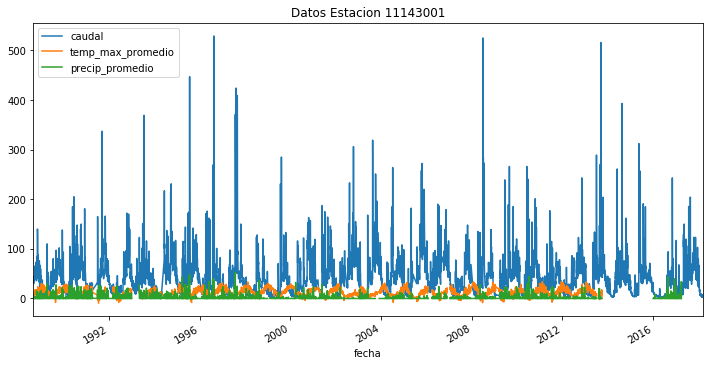

In [16]:
mask = (data.codigo_estacion == ids[20])
data.loc[mask].plot(title='Datos Estacion {}'.format(ids[20]), x='fecha', 
                                                               y=['caudal','temp_max_promedio','precip_promedio'], 
                                                               figsize=(12,6))


Observaciones sobre la base de datos:
- No hay datos missing en 'caudal'
- En 'caudal' las fechas de medición no siguen un período constante (frecuencia irregular en el tiempo).
- Las estaciones presentan mediciones durante distintos intervalos de tiempo (distintos rangos de años).
- Solo faltan datos de 'temp_max_promedio' y 'precip_promedio'. Estos se ven interrumpidos durante tramos en el tiempo, y recorren distintos rangos de tiempo para distintas estaciones.

#### Remover datos missing.

Podemos eliminar los datos _missing_ . Otra alternativa sería imputar datos (ej. con la media o la mediana), pero como la proporción de filas es mucho mayor al número de variables no debiese ser problema remover estas filas. 

In [17]:
data.dropna().isna().sum()

codigo_estacion      0
nombre               0
altura               0
latitud              0
longitud             0
codigo_cuenca        0
nombre_sub_cuenca    0
fecha                0
caudal               0
gauge_name           0
precip_promedio      0
temp_max_promedio    0
dtype: int64

In [18]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1256478 entries, 32 to 1411179
Data columns (total 12 columns):
codigo_estacion      1256478 non-null int64
nombre               1256478 non-null object
altura               1256478 non-null int64
latitud              1256478 non-null float64
longitud             1256478 non-null float64
codigo_cuenca        1256478 non-null int64
nombre_sub_cuenca    1256478 non-null object
fecha                1256478 non-null datetime64[ns]
caudal               1256478 non-null float64
gauge_name           1256478 non-null object
precip_promedio      1256478 non-null float64
temp_max_promedio    1256478 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 124.6+ MB


Procedemos a eliminar las filas con datos _missing_ .

In [19]:
n_rows_original = data.shape[0]
datacl = data.copy(deep=True) # nuevo dataset limpio de filas missing

datacl.sort_values(['codigo_estacion', 'fecha'], inplace=True)

datacl.dropna(inplace=True)
datacl.info()

print("\nSe eliminaron {} filas.".format(n_rows_original - datacl.shape[0]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1256478 entries, 94596 to 45405
Data columns (total 12 columns):
codigo_estacion      1256478 non-null int64
nombre               1256478 non-null object
altura               1256478 non-null int64
latitud              1256478 non-null float64
longitud             1256478 non-null float64
codigo_cuenca        1256478 non-null int64
nombre_sub_cuenca    1256478 non-null object
fecha                1256478 non-null datetime64[ns]
caudal               1256478 non-null float64
gauge_name           1256478 non-null object
precip_promedio      1256478 non-null float64
temp_max_promedio    1256478 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 124.6+ MB

Se eliminaron 154702 filas.


Analizamos las distribuciones históricas de 'caudal', 'temp_max_promedio' y 'precip_promedio'.

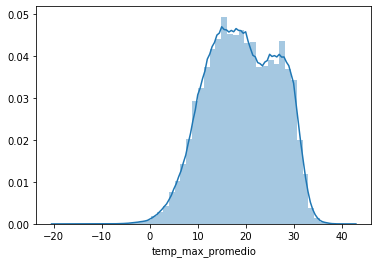

In [20]:
sns.distplot(datacl.temp_max_promedio)

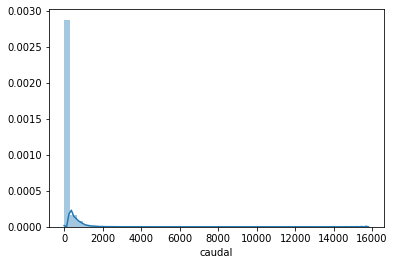

In [21]:
sns.distplot(datacl.caudal)

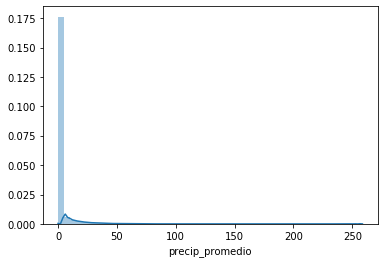

In [22]:
sns.distplot(datacl.precip_promedio)

Vemos en las variables 'precip_promedio' y 'caudal' que existen muchas entradas con valores pequeños y colas largas en la parte derecha de la distribución. Para 'temp_max_promedio' vemos una distribución bimodal.

A continuación, podemos ver las relaciones de las tres variables por pares.

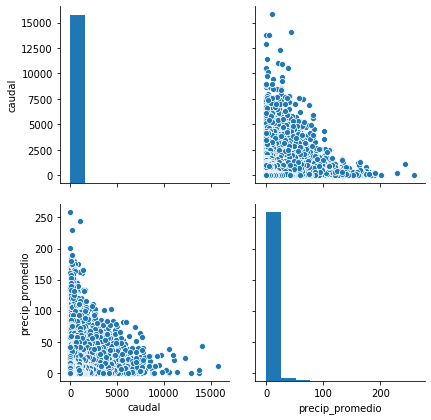

In [23]:
g = sns.pairplot(data=datacl, vars=['caudal', 'precip_promedio'], height=3)

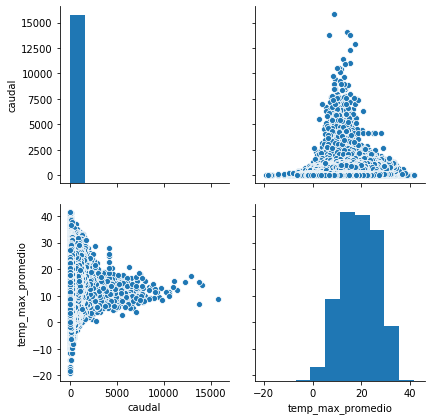

In [24]:
g = sns.pairplot(data=datacl, vars=['caudal', 'temp_max_promedio'], height=3)

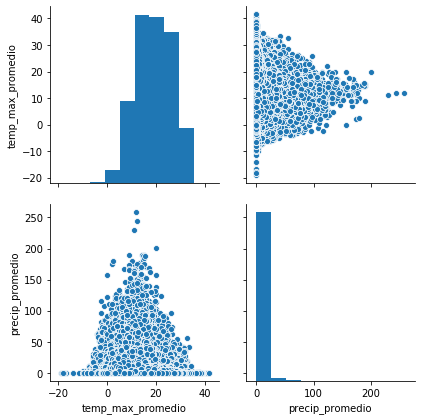

In [25]:
g = sns.pairplot(data=datacl, vars=['temp_max_promedio', 'precip_promedio'], height=3)

Revisamos las distribuciones históricas por estacion de medición para las tres variables. Revisamos los datos históricos de 50 estaciones aleatoreas para las variables 'caudal', 'precip_promedio' y 'temp_max_promedio'. En cuanto a 'caudal' y 'temp_max_promedio', se ve que existe una tendencia lineal en donde los maximos caudales ocurren alrededor de los 10ºC. Finalemente, 'temp_max_promedio' y 'precip_promedio' exhiben una relación con una tendencia lineal, donde también las precipitaciones aumentan alrededor de los 10ºC.

In [26]:
# revisamos nuevamente los ids de las estaciones
ids = datacl.codigo_estacion.unique()
len(ids)

133

Exploramos las variables por estación (20 estaciones aleatoreas).

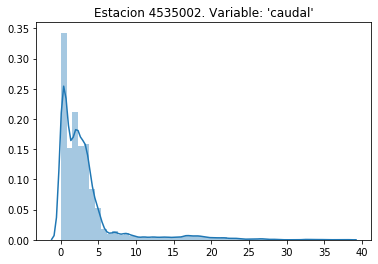

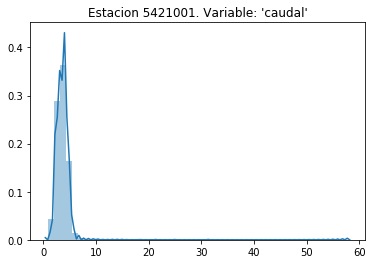

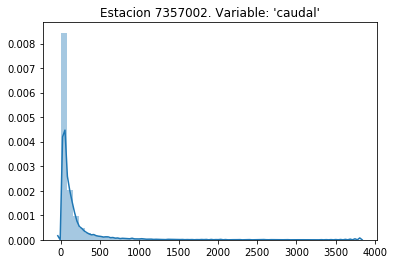

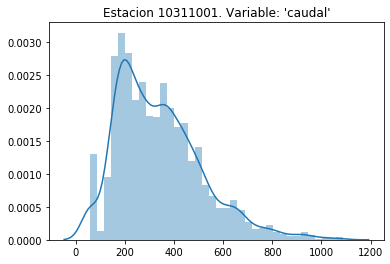

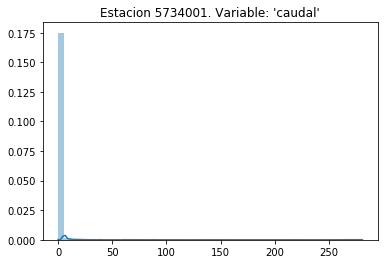

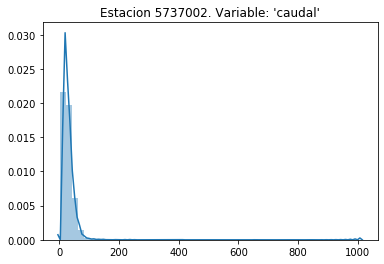

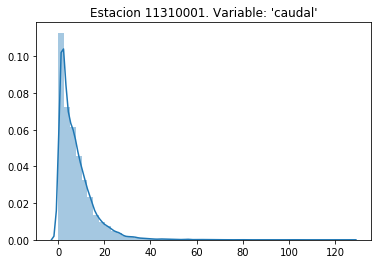

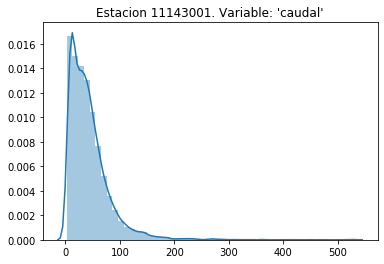

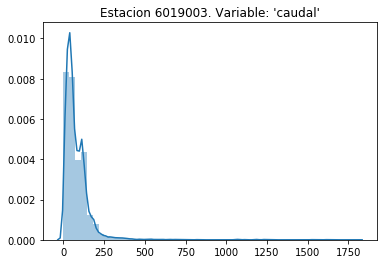

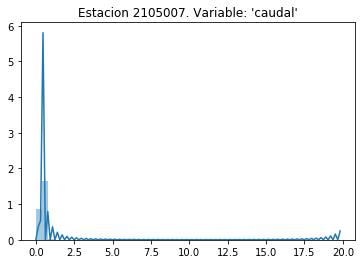

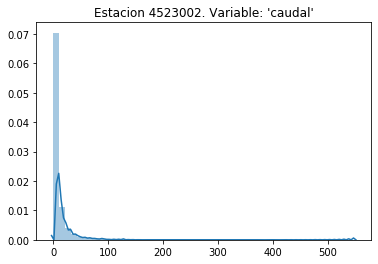

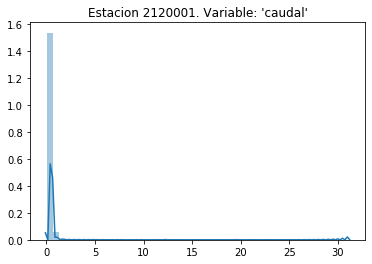

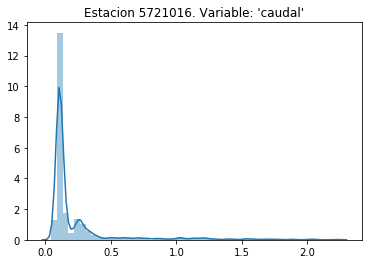

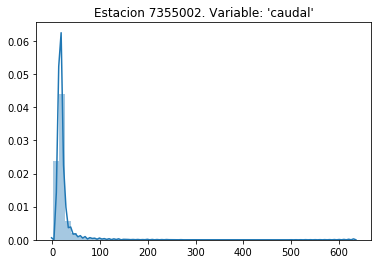

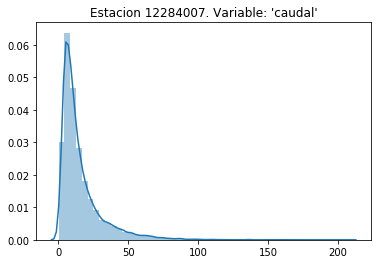

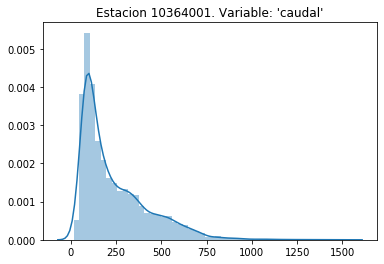

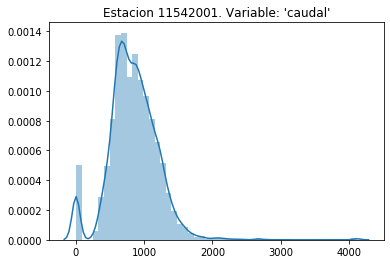

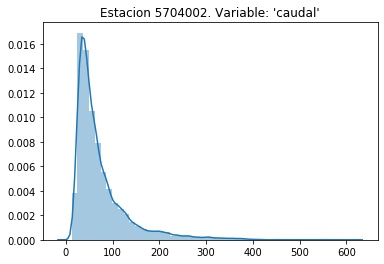

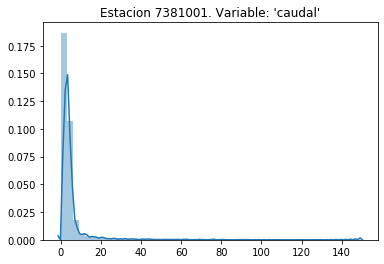

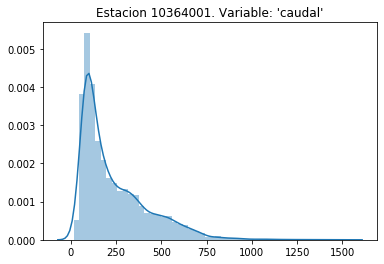

In [27]:
for i in range(20):
    idx = random.choice(ids)
    ax = sns.distplot(datacl.loc[datacl.codigo_estacion == idx]['caudal'])
    plt.title("Estacion {}. Variable: 'caudal'".format(idx))
    plt.xlabel('')
    plt.show()

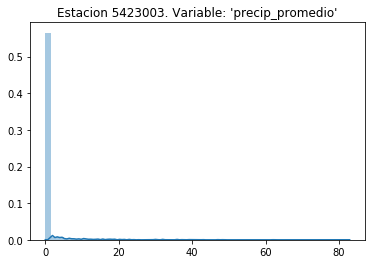

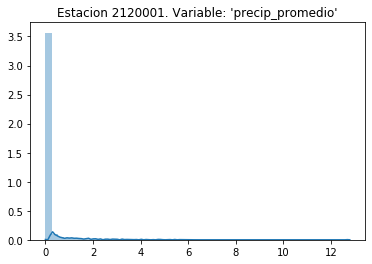

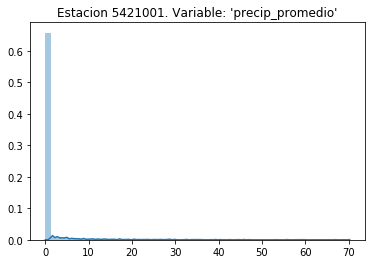

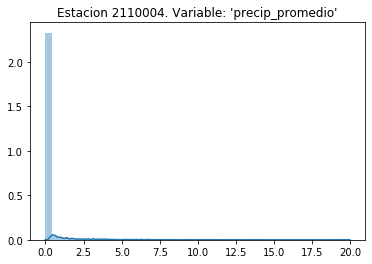

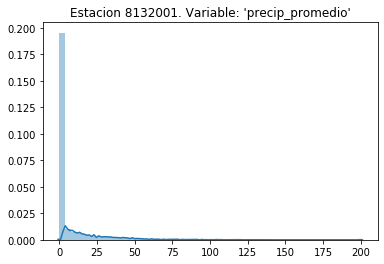

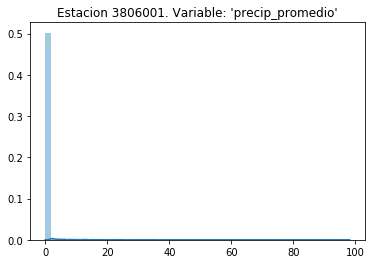

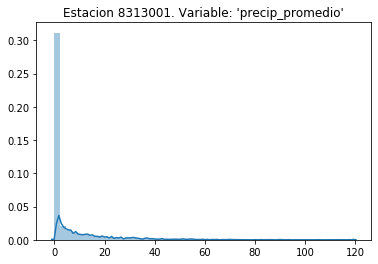

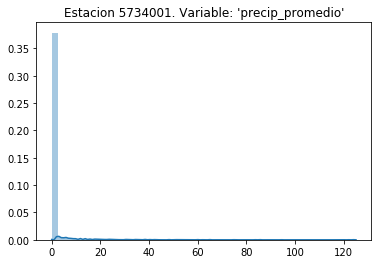

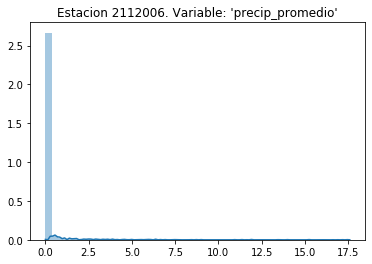

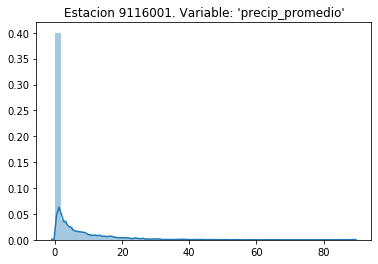

/Users/rafasacaan/miniconda3/envs/datacamp/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/rafasacaan/miniconda3/envs/datacamp/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


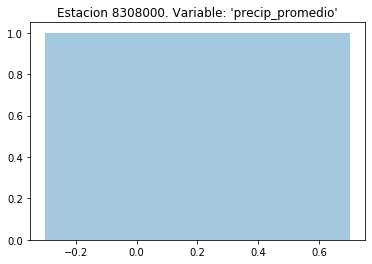

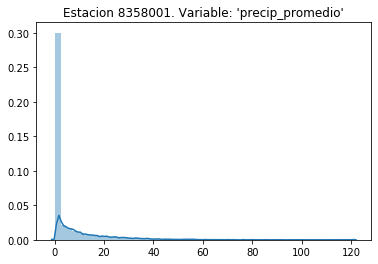

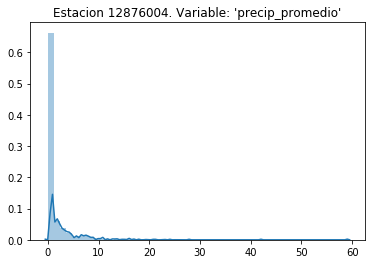

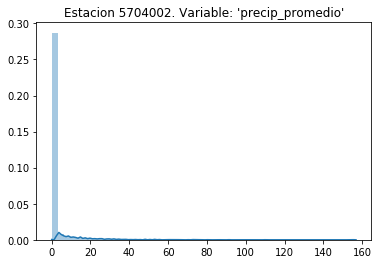

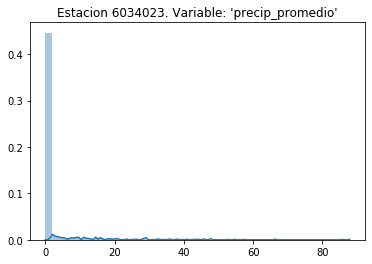

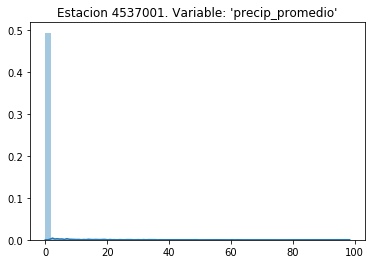

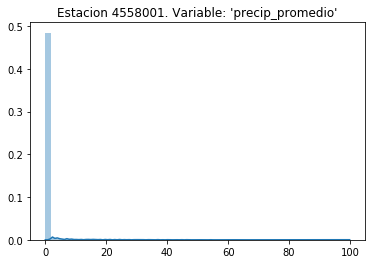

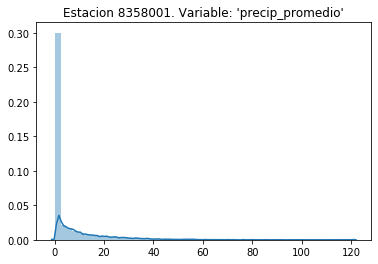

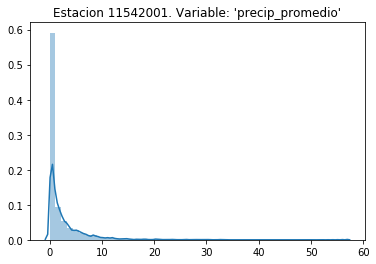

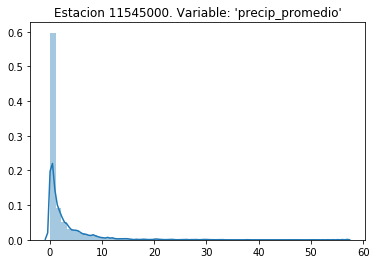

In [28]:
for i in range(20):
    idx = random.choice(ids)
    ax = sns.distplot(datacl.loc[datacl.codigo_estacion == idx]['precip_promedio'])
    plt.title("Estacion {}. Variable: 'precip_promedio'".format(idx))
    plt.xlabel('')
    plt.show()

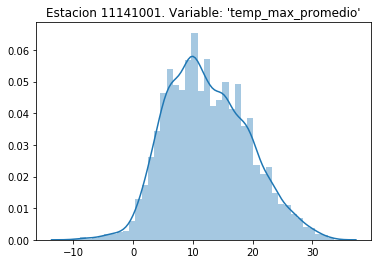

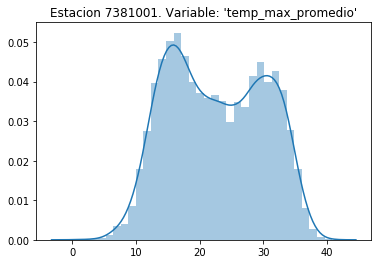

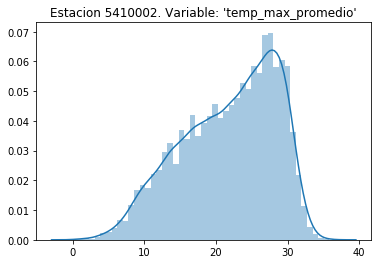

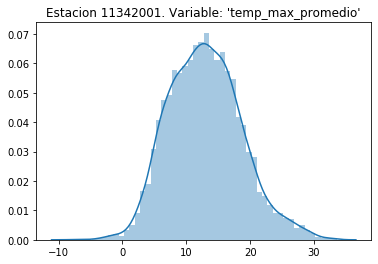

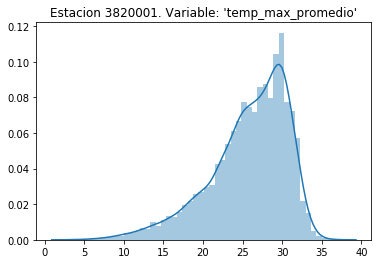

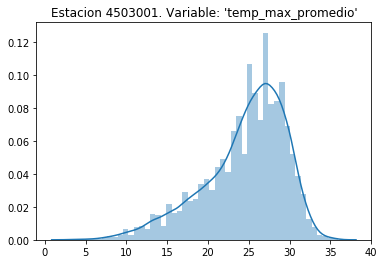

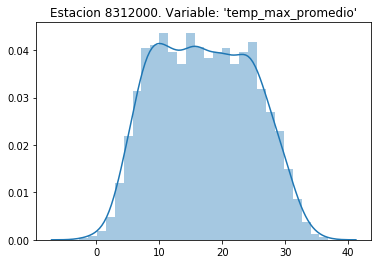

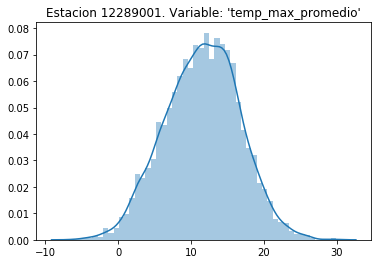

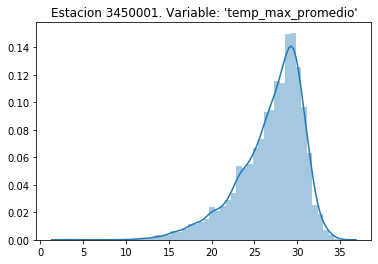

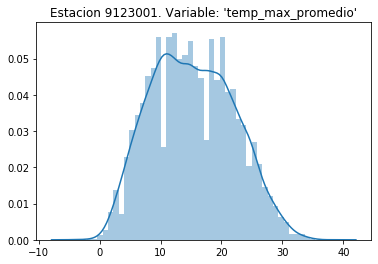

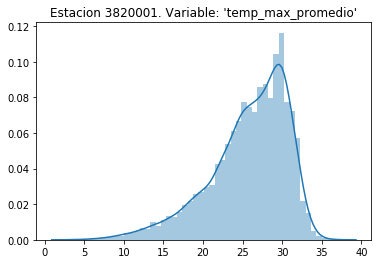

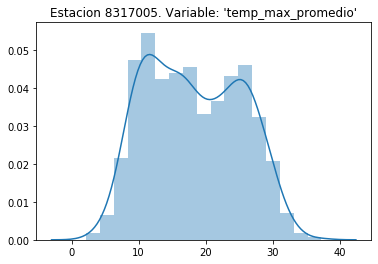

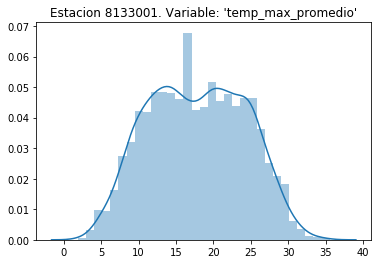

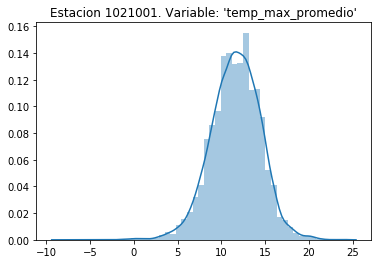

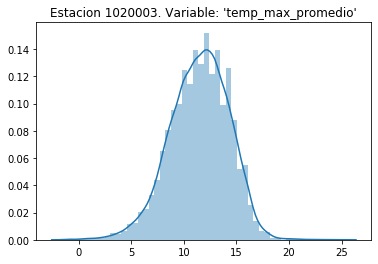

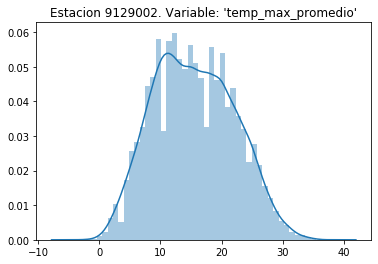

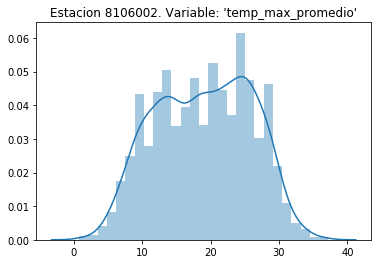

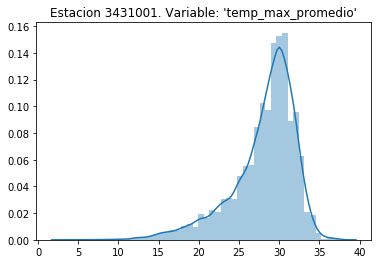

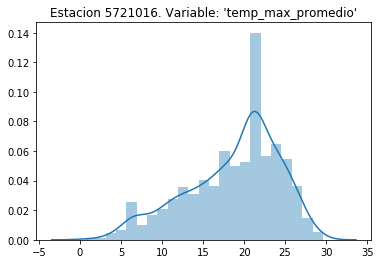

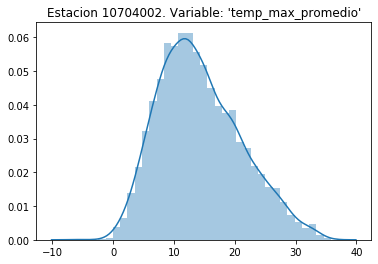

In [29]:
for i in range(20):
    idx = random.choice(ids)
    ax = sns.distplot(datacl.loc[datacl.codigo_estacion == idx]['temp_max_promedio'])
    plt.title("Estacion {}. Variable: 'temp_max_promedio'".format(idx))
    plt.xlabel('')
    plt.show()

## Pregunta 3

**Plots de precipitación, temperatura y caudal.**

**a. Escribir una función que tome como input una estación y haga plot de los datos para
una columna. Debiese tener estos argumentos:**

```{python}
def time_plot_una_estacion(codigo_estacion, columna, fecha_min,
fecha_max):
```

**b. Ahora escribir una función que haga plots de varias columnas, para poder visualizar
caudal, precipitación y temperatura al mismo tiempo. Como las series están en
diferentes escalas, sugerimos normalizarlas antes de hacer el plot (por ejemplo,
dividiendo por la primera observación de cada seria)**

```{python}
def time_plot_estaciones_varias_columnas(codigo_estacion,
columnas, fecha_min, fecha_max):
```


A las funciones requeridas, agregaremos como argumento el dataset a utilizar.

In [30]:
def time_plot_una_estacion(data, codigo_estacion, columna, fecha_min, fecha_max):
    """
    Plot de la variable 'columna' en la estación 'codigo_estacion', entre las fechas 'fecha_min' y 'fecha_max'
    """
    fecha_filtro = (data.fecha > fecha_min) & (data.fecha < fecha_max)
    estacion_filtro = (data.codigo_estacion == codigo_estacion)
    df = data.loc[fecha_filtro & estacion_filtro]
    if len(df):
        ax = df.plot(x='fecha', y=columna)
        ax.set_title("Estacion {}.".format(codigo_estacion))
        return ax
    else:
        print("No hay datos en ese rango de fechas.")

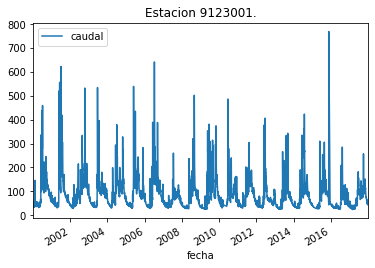

In [31]:
time_plot_una_estacion(data, ids[random.randint(0, 132)], 'caudal', '2000', '2018')

In [32]:
def time_plot_estaciones_varias_columnas(data, codigo_estacion, columnas, fecha_min, fecha_max):
    """
    Plot de las variables 'columnas' en la estación 'codigo_estacion', entre las fechas 'fecha_min' y 'fecha_max'
    """
    fecha_filtro = (data.fecha > fecha_min) & (data.fecha < fecha_max)
    estacion_filtro = (data.codigo_estacion == codigo_estacion)
    df = data.loc[fecha_filtro & estacion_filtro].copy(deep=True)
    
    
    if len(df):
        fig, ax = plt.subplots()
        for col in columnas:
            max_val = df[col].dropna().values.max()
            min_val = df[col].dropna().values.min()
            df[col] = (df[col] - min_val)/(max_val - min_val) # normalización MinMax
            df.plot(x='fecha', y=col, ax=ax)
        ax.set_title("Estacion {}. Normalización MinMax.".format(codigo_estacion))
        return ax
    else:
        print("No hay datos en ese rango de fechas.")

In [33]:
time_plot_estaciones_varias_columnas(datacl, 
                                     ids[np.random.randint(0,132)], 
                                     ['caudal','precip_promedio','temp_max_promedio'], 
                                     '06-1980', '12-2001')

No hay datos en ese rango de fechas.


# Pregunta 4.

**Crea tres variables llamadas**
- caudal_extremo
- temp_extremo
- precip_extremo

**Dichas variables toman valor 1 un día si el caudal/temperatura/precipitación (según sea el caso)
observado ese día es extremo. Esto significa que es mayor de lo "esperado". Para capturar esta idea,
el valor de caudal, por ejemplo, toma valor 1 si está sobre el percentil 95 de ese caudal para esa
estación del año (Verano, Primavera, Otoño, Invierno). Toma valor 0 cuando está bajo ese percentil.
En otras palabras, para cada estación de medición y para cada estación del año, debes considerar la
distribución histórica de caudal/temperatura/precipitación para elegir ese percentil 95.
Esta medida toma en cuenta la estacionalidad, pues, por ejemplo, una temperatura de 25 grados en
invierno puede ser extrema, pero en verano es normal. También toma en cuenta que cada cuenca (o
estación) es diferente. Lo que es extremo para una cuenca no lo es para la otra.
¿Les parece razonable esta medida para capturar algo “extremo”? ¿Usarían otra? ¿Cuál? (Solamente
descríbanla, no la codifiquen! Vamos a usar la definición de Spike para esta desafío)**

Identificar los codigos de cuenca de cada estacion de medición.

In [34]:
for idx in ids:
    cc = datacl[datacl.codigo_estacion == idx]["codigo_cuenca"].values[0]
    print("Codigo_estacion: {}. Codigo_cuenca: {}".format(idx,cc))

Codigo_estacion: 1020003. Codigo_cuenca: 10
Codigo_estacion: 1021001. Codigo_cuenca: 10
Codigo_estacion: 1050004. Codigo_cuenca: 10
Codigo_estacion: 1211001. Codigo_cuenca: 12
Codigo_estacion: 2103003. Codigo_cuenca: 21
Codigo_estacion: 2104002. Codigo_cuenca: 21
Codigo_estacion: 2104003. Codigo_cuenca: 21
Codigo_estacion: 2105001. Codigo_cuenca: 21
Codigo_estacion: 2105002. Codigo_cuenca: 21
Codigo_estacion: 2105005. Codigo_cuenca: 21
Codigo_estacion: 2105007. Codigo_cuenca: 21
Codigo_estacion: 2110001. Codigo_cuenca: 32
Codigo_estacion: 2110002. Codigo_cuenca: 32
Codigo_estacion: 2110004. Codigo_cuenca: 32
Codigo_estacion: 2110031. Codigo_cuenca: 32
Codigo_estacion: 2112005. Codigo_cuenca: 32
Codigo_estacion: 2112006. Codigo_cuenca: 32
Codigo_estacion: 2112007. Codigo_cuenca: 32
Codigo_estacion: 2120001. Codigo_cuenca: 21
Codigo_estacion: 3430001. Codigo_cuenca: 34
Codigo_estacion: 3430002. Codigo_cuenca: 34
Codigo_estacion: 3431001. Codigo_cuenca: 34
Codigo_estacion: 3434003. Codigo

Definir una función para asignar una estación del año (invierno, primavera, verano, otoño) a una fecha de entrada.

In [35]:
def get_estacion(date_in):
    """
    Obtener estación del año desde fecha 'date_in' [datetime].
    """
    #date_in = date_in.replace(year=2000)
    date_in = pd.to_datetime(date_in)
    Y = date_in.year
    if (date_in >= datetime.date(Y, 1,1)) & (date_in <= datetime.date(Y, 3, 20)):
        return 'verano'
    elif (date_in >= datetime.date(Y, 3, 21)) & (date_in <= datetime.date(Y, 6, 20)):
        return 'otoño'
    elif (date_in >= datetime.date(Y, 6, 21)) & (date_in <= datetime.date(Y, 9, 22)):
        return 'invierno'
    elif (date_in >= datetime.date(Y, 9, 23)) & (date_in <= datetime.date(Y, 12, 20)):
        return 'primavera'
    elif (date_in >= datetime.date(Y, 12, 21)) & (date_in <= datetime.date(Y, 12, 31)):
        return 'verano'
    else:
        raise TypeError("La variable 'date_in' debe ser tipo 'datetime'.")

Agregar columna 'season' al dataset 'datacl' para la estación del año de cada medida.

In [36]:
datacl["season"] = datacl.apply(lambda row: get_estacion(row.fecha),axis=1)
datacl.head()

,codigo_estacion,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,fecha,caudal,gauge_name,precip_promedio,temp_max_promedio,season
94596,1020003,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,1985-01-01,0.041,Rio Lauca En Estancia El Lago,5.066667,16.0,verano
97550,1020003,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,1985-01-02,0.052,Rio Lauca En Estancia El Lago,8.455556,11.0,verano
90461,1020003,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,1985-01-03,0.099,Rio Lauca En Estancia El Lago,8.433333,10.0,verano
88008,1020003,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,1985-01-04,0.078,Rio Lauca En Estancia El Lago,7.966667,17.0,verano
94328,1020003,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,1985-01-05,0.080,Rio Lauca En Estancia El Lago,10.400000,9.0,verano


Encontrar los percentiles 95 para cada una de las variables ('caudal', 'precip_promedio' y 'temp_max_promedio') y generar columnas auxiliares.

In [37]:
datacl['caudal_q95'] = datacl.groupby(['codigo_estacion', 'season'])['caudal'].transform('quantile', 0.95)
datacl['temp_q95'] = datacl.groupby(['codigo_estacion', 'season'])['temp_max_promedio'].transform('quantile', 0.95)
datacl['precip_q95'] = datacl.groupby(['codigo_estacion', 'season'])['precip_promedio'].transform('quantile', 0.95)

Crear las variables binarias que indican valores extremos.

In [38]:
datacl["caudal_extremo"] = np.where(datacl["caudal"] > datacl["caudal_q95"],1,0)
datacl["temp_extremo"] = np.where(datacl["temp_max_promedio"] > datacl["temp_q95"],1,0)
datacl["precip_extremo"] = np.where(datacl["precip_promedio"] > datacl["precip_q95"],1,0) 
datacl.head()

,codigo_estacion,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,fecha,caudal,gauge_name,precip_promedio,temp_max_promedio,season,caudal_q95,temp_q95,precip_q95,caudal_extremo,temp_extremo,precip_extremo
94596,1020003,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,1985-01-01,0.041,Rio Lauca En Estancia El Lago,5.066667,16.0,verano,1.7285,15.95,10.737,0,1,0
97550,1020003,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,1985-01-02,0.052,Rio Lauca En Estancia El Lago,8.455556,11.0,verano,1.7285,15.95,10.737,0,0,0
90461,1020003,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,1985-01-03,0.099,Rio Lauca En Estancia El Lago,8.433333,10.0,verano,1.7285,15.95,10.737,0,0,0
88008,1020003,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,1985-01-04,0.078,Rio Lauca En Estancia El Lago,7.966667,17.0,verano,1.7285,15.95,10.737,0,1,0
94328,1020003,Rio Lauca En Estancia El Lago,4370,-18.2325,-69.331902,10,Rio Lauca,1985-01-05,0.080,Rio Lauca En Estancia El Lago,10.400000,9.0,verano,1.7285,15.95,10.737,0,0,0



El método propuesto es una forma razonable para capturar valores extremos, especialmente cuando se asume que la distribución de los datos es gaussiana o casi gaussiana. De esta forma, se capturan datos que están aproximadamente a más de dos desviaciones estándar alejadas de la media. Sin embargo, con este método siempre se considerará que una porción de los datos es extrema, lo que representa un problema si hay insuficientes datos o si la distribución esta sub-sampleada (los "extremos" capturados no serían reales extremos de la distribución subyacente).

Por otro lado, para distribuciones no gaussianas es recomendable mirar el _interquartile range_ o rango intercuartil . De esta forma se establecen umbrales para valores extremos que se calculan con respecto a la distancia del percentil 25 con el 75 (rango intercuartil). Así, se establece un umbral superior para valores extremos cuando éstos están  1.5 veces el rango intercuartil por sobre el percentil 75, y cuando están 1.5 veces el rango intercuartil por debajo del percentil 25. El factor 1.5 es típicamente usado y puede ser ajustado. Con esto, se pueden identificar valores extremos que se encuentran alejados del "cuerpo" de los datos (i.e. el rango intercuartil) el cual contiene el 50% de los datos. Esto es fácil de visualizar con un _boxplot_ .

En este caso, las distribuciones de los datos son muy disímiles dentro de cada variable (especialmente las de precipitación y caudal) y lejos de parecerse a una distribución gaussiana, por lo que usaría el método intercuartil. Por otro lado, se observan colas muy largas en las distribuciones en muchos casos y mucha densidad de datos en las partes inferiores de las distribuciones en general, por lo que se podría estar efectivamente capturando valores extremos alejados del cuerpo.

## Pregunta 5.

**Analicen la variable caudal_extremo. Los comportamientos en diferentes cuencas son muy
diferentes?**

Agregamos una variable auxiliar al dataset: 'year'.

In [39]:
datacl['year'] = datacl.fecha.dt.year

Podemos revisar primero la cantidad de eventos extremos en 'caudal_extremo' comparados con los eventos no extremos. Vemos que las clases no están balanceadas.

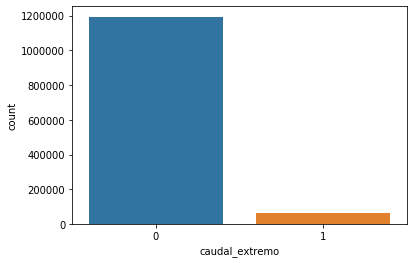

In [40]:
ax = sns.countplot(x='caudal_extremo', data=datacl)
plt.show()

Graficamos la cantidad de eventos de caudal extremo para cada cuenca o estación de medición (rojo) y la cantidad de mediciones registradas por estación (azul).

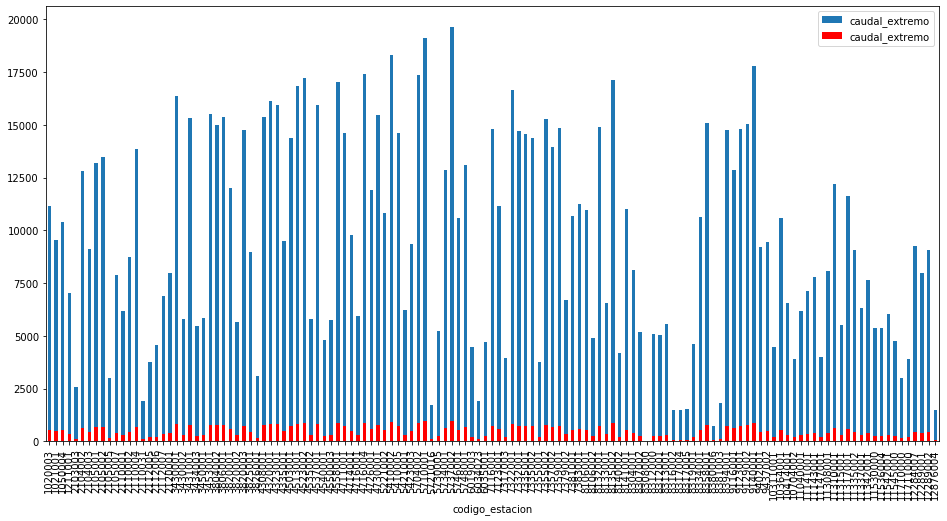

In [41]:
ax = datacl.groupby(['codigo_estacion'])[['caudal_extremo']].count().plot.bar(figsize=(16,8))
datacl.groupby(['codigo_estacion'])[['caudal_extremo']].sum().plot.bar(figsize=(16,8),ax=ax, color='red')
plt.show()

Del gráfico anterior podemos observar que la cantidad de eventos extremos de caudal son disímiles entre cuencas. Por ejemplo, las cuencas 8380006, 8316002, 8317004 y 8317005 presentan pocos eventos (100 aprox.) de caudal extremo, comparativamente. La cuenca 5737002 presenta la mayor cantidad (950 aprox.) de eventos extremos de caudal, superando a las demás. Por lo tanto no se observa una cantidad similar de eventos extremos de caudal a través de las distintas cuencas.

Se puede notar especialmente, que la estacion 8308000 presenta una sola medición, y por lo tanto, no registra valores extremos de caudal.

También revisamos la variable 'caudal_extremo' para cada estación y cada estación del año (season), para 50 estaciones de medición aleatorias.

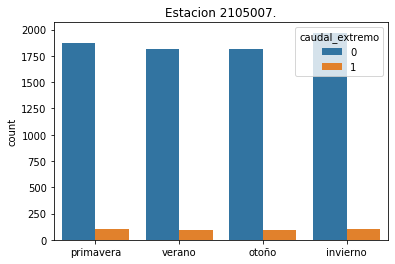

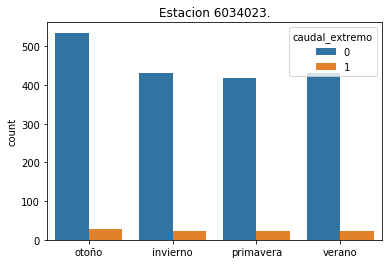

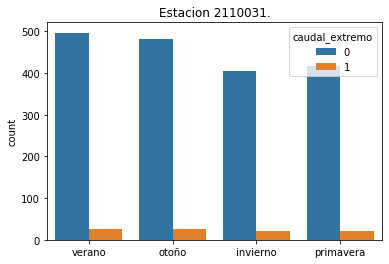

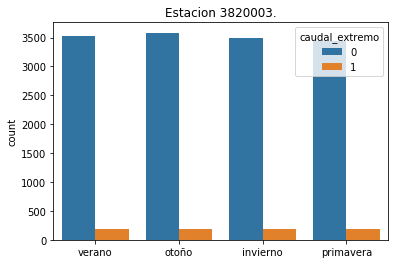

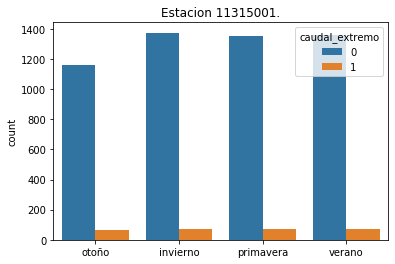

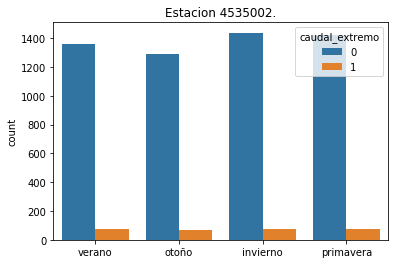

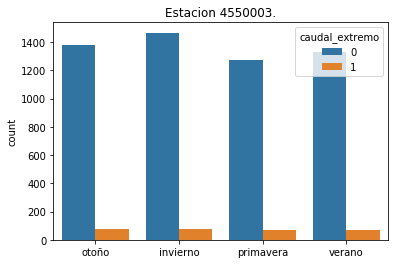

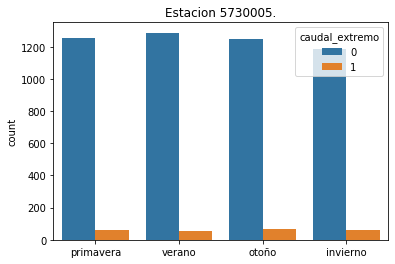

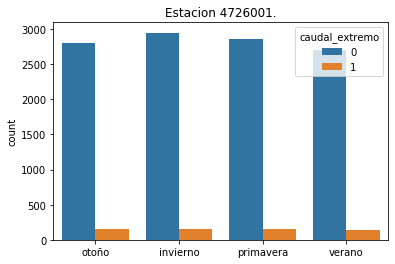

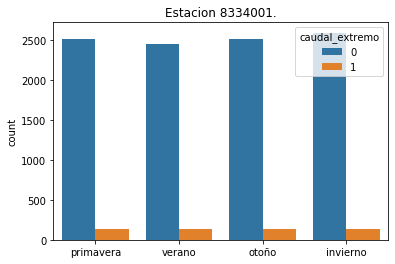

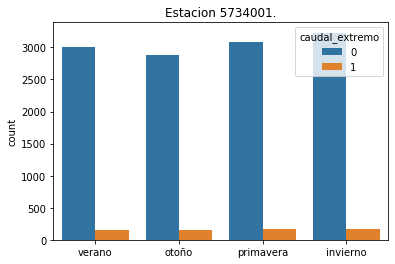

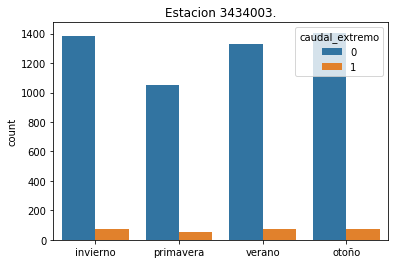

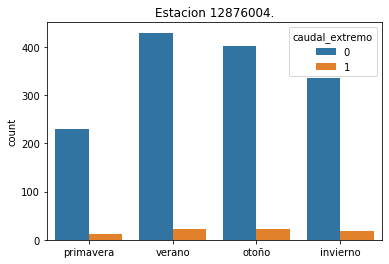

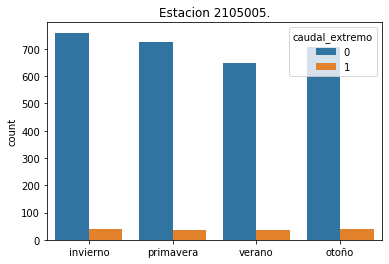

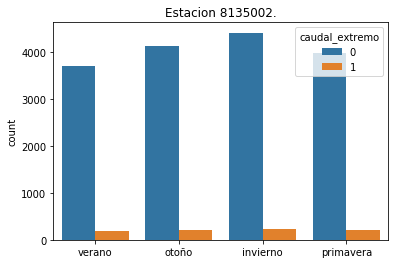

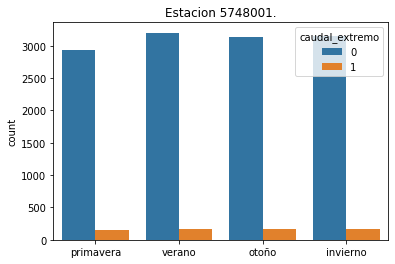

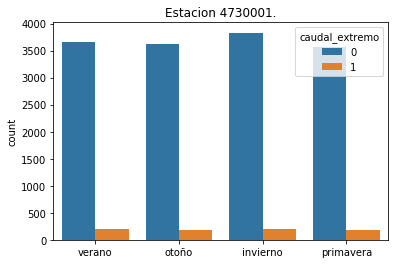

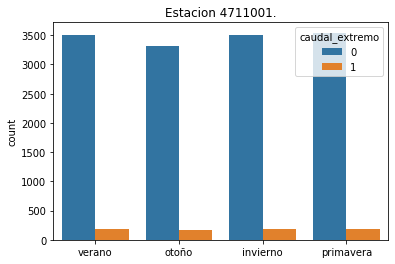

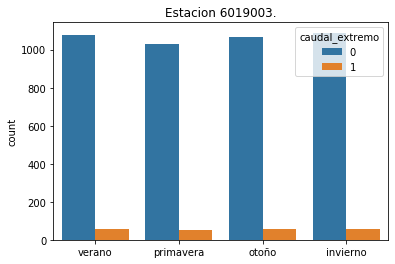

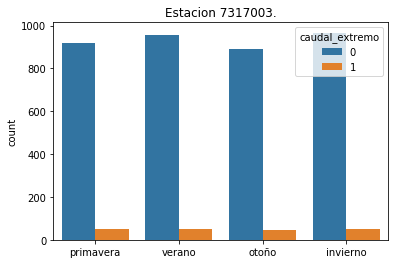

In [42]:
import random
for i in range(20):
    idx = random.choice(ids)
    ax = sns.countplot(x='season',hue='caudal_extremo', data=datacl.loc[datacl.codigo_estacion == idx])
    plt.title("Estacion {}.".format(idx))
    plt.xlabel('')
    plt.show()

Debido a cómo decidimos definir 'valor extremo', vemos que el dataset captura cantidades similares de valores extremos de caudal a lo largo de las estaciones del año para cada estación de medición.

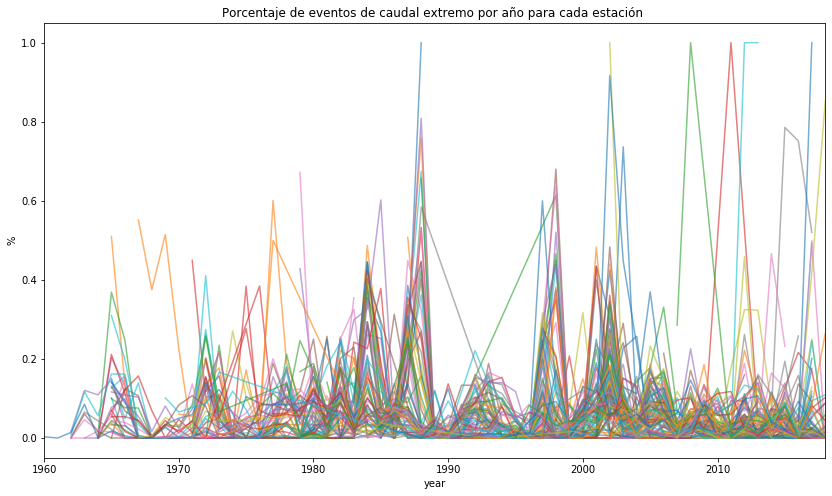

In [43]:
fig, ax = plt.subplots(figsize=(16,8))
for idx in ids:
    datacl.loc[datacl.codigo_estacion==idx].groupby(['year'])[['caudal_extremo']]\
                    .agg('mean')\
                    .plot(figsize=(14,8),ax=ax,legend='',alpha=0.6)
ax.set_title("Porcentaje de eventos de caudal extremo por año para cada estación ")
ax.set_ylabel("%")
plt.show()

Del gráfico anterior vemos que los eventos de caudal extremo para cada estación presentan multiples _peaks_ a lo largo de los años.

## Pregunta 6.

**Hagan un plot del porcentaje de eventos extremos a través del tiempo (caudal_extremo,
temp_extremo, precip_extremo). Se han vuelto más o menos comunes?**

En el gráfico a continuación podemos ver la cantidad agregada de eventos extremos por año en relación al número de medidas registradas en ese año. De esta forma, se normaliza la cantidad de eventos por año por el tamaño del sampleo de cada año.

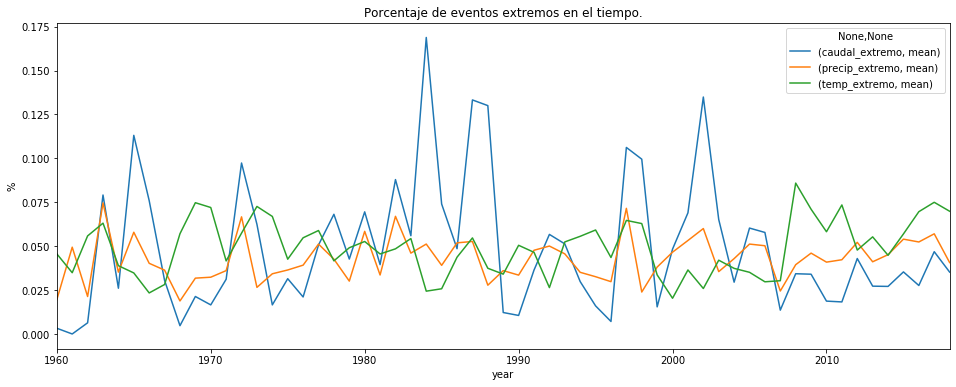

In [44]:
df = datacl.groupby(['year'], as_index=False)[['caudal_extremo','precip_extremo','temp_extremo']].agg(['mean'])
ax = df.plot(figsize=(16,6))
ax.set_title("Porcentaje de eventos extremos en el tiempo.")
ax.set_ylabel("%")
plt.show()

No se observa una tendencia definida en cuanto a un aumento o disminución de eventos extremos a lo largo del tiempo. En la variable de caudal extremo se vean _peaks_ a lo largo del tiempo sin un patrón definido.

## Pregunta 7.

**Predicción de caudal extremo. Entrena uno o varios modelos (usando el/los algoritmo(s) que
prefieras) para estimar la probabilidad de un caudal extremo (la variable binaria
caudal_extremo). Siéntete libre de generar variables adicionales y/o complementar con
variables externas.
¿Qué datos podemos usar y cuáles no? Por supuesto, no podemos usar datos del futuro, pero
¿es lícito usar información del mismo día? ¿del día anterior? Todo depende de cómo
propongas que el modelo se puede usar. Haz una propuesta de cómo usar tu modelo en la
práctica (por ejemplo: una vez entrenado, voy a tomar los datos de XXX hasta el lunes y
predecir para el día siguiente). Dada la propuesta, declara restricciones de información para
caudal, temperatura y precipitación**

Las variables a usar son:
   - Variable caudal
   - Variable precip_promedio
   - Variable temp_max_promedio
   - Variable caudal_q95, precip_q95 y temp_q95 (umbral de valores extremos)
    
   - Media de los últimos 10 días (variables caudal, precip. y temperatura)
   - Desviación estándar de los últimos 10 días (variables caudal, precip. y temperatura)
   - Suma de caudales extremos en los últimos 30 días  (variables caudal, precip. y temperatura)
   
   
No podemos usar los valores del mismo día, pero usaremos los datos del dia anterior y hasta 30 datos inmediatamente pasados como ventana.

Este modelo funciona de tal manera de ingresar valores para cada uno de los features descritos y predecirá una probabilidad de que al día siguiente ocurra un evento de caudal extremo. Dado que no se encontró una tendencia a lo largo de los años con respecto a la cantidad de eventos de caudales extremos, es que es posible prescindir de una fecha como input del modelo. Las características propias de las cuencas y las estaciones del años están capturadas en las variables de eventos extremos y en los umbrales de decisión de eventos extremos.

Si un usuario quiere estimar la probabilidad de evento de caudal extremo para una fecha determinada, debe tener series de tiempo de las variables descritas por 30 días previos al día de la predicción deseada. Luego, debe generar nuevas columnas a partir de la las variables de caudal, temperatura y precipitación. También, debe obtener los umbrales de eventos extremos: se pueden obtener aproximando geográficamente la estación de medidas a alguna existente, y con la información de la estación del año de la fecha a predecir obtener los percentiles 95 de esta misma base de datos. Finalmente, puede generar una fila con valores para cada uno de los features descritos, la que servirá como input al modelo de predicción.

In [45]:
datacl['caudal_mean_roll'] = datacl[['caudal']].rolling(10).mean()
datacl['precip_mean_roll'] = datacl[['precip_promedio']].rolling(10).mean()
datacl['temp_mean_roll'] = datacl[['temp_max_promedio']].rolling(10).mean()

datacl['caudal_std_roll'] = datacl[['caudal']].rolling(10).std()
datacl['precip_std_roll'] = datacl[['precip_promedio']].rolling(10).std()
datacl['temp_std_roll'] = datacl[['temp_max_promedio']].rolling(10).std()

datacl['caudal_extremo_mean_roll'] = datacl[['caudal_extremo']].rolling(30).mean()
datacl['precip_extremo_mean_roll'] = datacl[['precip_extremo']].rolling(30).mean()
datacl['temp_extremo_mean_roll'] = datacl[['temp_extremo']].rolling(30).mean()

cols = ['caudal', 'precip_promedio', 'temp_max_promedio',
        'caudal_q95','precip_q95','temp_q95',
        'caudal_mean_roll','precip_mean_roll','temp_mean_roll',
        'caudal_std_roll','precip_std_roll','temp_std_roll',
        'caudal_extremo_mean_roll','precip_extremo_mean_roll','temp_extremo_mean_roll',
        'caudal_extremo']

data.head()

,codigo_estacion,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,fecha,caudal,gauge_name,precip_promedio,temp_max_promedio
0,4540001,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),1960-01-06,0.812,Rio Grande En Paloma 1,0.0,NaN
1,4540001,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),1960-03-27,0.236,Rio Grande En Paloma 1,0.0,NaN
2,4540001,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),1960-05-07,0.730,Rio Grande En Paloma 1,0.0,NaN
3,4540001,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),1960-06-30,3.590,Rio Grande En Paloma 1,0.0,NaN
4,4540001,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),1960-07-22,1.370,Rio Grande En Paloma 1,0.0,NaN


Creamos un nuevo dataset para el modelo. 

In [46]:
df = datacl[cols].copy(deep=True)

Sólo falta "correr" la variable 'caudal_extremo', la cual es nuestro target y representa la variable que queremos predecir (i.e. la medición de mañana).

In [47]:
df['caudal_extremo'] = df['caudal_extremo'].shift(-1) 

In [48]:
df.isna().sum()

caudal                       0
precip_promedio              0
temp_max_promedio            0
caudal_q95                   0
precip_q95                   0
temp_q95                     0
caudal_mean_roll             9
precip_mean_roll             9
temp_mean_roll               9
caudal_std_roll              9
precip_std_roll              9
temp_std_roll                9
caudal_extremo_mean_roll    29
precip_extremo_mean_roll    29
temp_extremo_mean_roll      29
caudal_extremo               1
dtype: int64

In [49]:
df.shape[0]

1256478

In [50]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.shape[0]

1256448

In [51]:
df.head(30)

,index,caudal,precip_promedio,temp_max_promedio,caudal_q95,precip_q95,temp_q95,caudal_mean_roll,precip_mean_roll,temp_mean_roll,caudal_std_roll,precip_std_roll,temp_std_roll,caudal_extremo_mean_roll,precip_extremo_mean_roll,temp_extremo_mean_roll,caudal_extremo
0,95817,0.063,13.722222,16.0,1.7285,10.737,15.95,0.0449,1.841111,15.2,0.006999,4.397047,1.032796,0.000000,0.033333,0.333333,0.0
1,92104,0.074,2.166667,10.0,1.7285,10.737,15.95,0.0476,2.057778,14.9,0.011597,4.349368,1.852926,0.000000,0.033333,0.300000,0.0
2,96295,0.062,11.744445,12.0,1.7285,10.737,15.95,0.0495,3.232222,14.5,0.012295,5.228734,2.013841,0.000000,0.066667,0.300000,0.0
3,91400,0.077,1.722222,12.0,1.7285,10.737,15.95,0.0531,3.398889,14.2,0.014587,5.142071,2.149935,0.000000,0.066667,0.300000,0.0
4,90669,0.061,4.455555,13.0,1.7285,10.737,15.95,0.0543,3.823333,13.9,0.014705,5.023513,2.078995,0.000000,0.066667,0.266667,0.0
5,98780,0.067,8.222222,16.0,1.7285,10.737,15.95,0.0567,4.645556,14.1,0.014614,5.001033,2.183270,0.000000,0.066667,0.300000,0.0
6,88479,0.074,4.966667,11.0,1.7285,10.737,15.95,0.0600,5.142222,13.7,0.014399,4.727556,2.359378,0.000000,0.066667,0.300000,0.0
7,92829,0.094,4.477778,12.0,1.7285,10.737,15.95,0.0653,5.590000,13.4,0.016262,4.386116,2.366432,0.000000,0.066667,0.300000,0.0
8,97815,0.103,10.244445,12.0,1.7285,10.737,15.95,0.0716,6.614445,13.0,0.017526,4.123954,2.211083,0.000000,0.066667,0.300000,0.0
9,96806,0.125,11.744445,11.0,1.7285,10.737,15.95,0.0800,7.346667,12.5,0.021013,4.336058,2.013841,0.000000,0.100000,0.300000,0.0


In [52]:
df.drop(columns='index', inplace=True)
df.head(30)

,caudal,precip_promedio,temp_max_promedio,caudal_q95,precip_q95,temp_q95,caudal_mean_roll,precip_mean_roll,temp_mean_roll,caudal_std_roll,precip_std_roll,temp_std_roll,caudal_extremo_mean_roll,precip_extremo_mean_roll,temp_extremo_mean_roll,caudal_extremo
0,0.063,13.722222,16.0,1.7285,10.737,15.95,0.0449,1.841111,15.2,0.006999,4.397047,1.032796,0.000000,0.033333,0.333333,0.0
1,0.074,2.166667,10.0,1.7285,10.737,15.95,0.0476,2.057778,14.9,0.011597,4.349368,1.852926,0.000000,0.033333,0.300000,0.0
2,0.062,11.744445,12.0,1.7285,10.737,15.95,0.0495,3.232222,14.5,0.012295,5.228734,2.013841,0.000000,0.066667,0.300000,0.0
3,0.077,1.722222,12.0,1.7285,10.737,15.95,0.0531,3.398889,14.2,0.014587,5.142071,2.149935,0.000000,0.066667,0.300000,0.0
4,0.061,4.455555,13.0,1.7285,10.737,15.95,0.0543,3.823333,13.9,0.014705,5.023513,2.078995,0.000000,0.066667,0.266667,0.0
5,0.067,8.222222,16.0,1.7285,10.737,15.95,0.0567,4.645556,14.1,0.014614,5.001033,2.183270,0.000000,0.066667,0.300000,0.0
6,0.074,4.966667,11.0,1.7285,10.737,15.95,0.0600,5.142222,13.7,0.014399,4.727556,2.359378,0.000000,0.066667,0.300000,0.0
7,0.094,4.477778,12.0,1.7285,10.737,15.95,0.0653,5.590000,13.4,0.016262,4.386116,2.366432,0.000000,0.066667,0.300000,0.0
8,0.103,10.244445,12.0,1.7285,10.737,15.95,0.0716,6.614445,13.0,0.017526,4.123954,2.211083,0.000000,0.066667,0.300000,0.0
9,0.125,11.744445,11.0,1.7285,10.737,15.95,0.0800,7.346667,12.5,0.021013,4.336058,2.013841,0.000000,0.100000,0.300000,0.0


Ahora, dividimos el dataset en train y test sets.

In [53]:
df.shape[0]

1256448

Calculamos el índice de la fila en el 80% del dataset.

In [54]:
df.shape[0]*0.8

1005158.4

Como anteriormente vimos que las clases están muy desbalanceadas, procedemos a hacer un downsampling de la clases caudal_extremo igual a cero. Como aún la relación número de datos versus variables es alta, no corremos grandes riesgos con un downsampling. Para esto, contamos las instancias por cada clase de esta variable y las dividimos.

In [55]:
df_train = df
count_class_0, count_class_1 = df_train.caudal_extremo.value_counts()

df_class_0 = df_train[df_train['caudal_extremo'] == 0]
df_class_1 = df_train[df_train['caudal_extremo'] == 1]

Random under-sampling:
1.0    62617
0.0    62617
Name: caudal_extremo, dtype: int64


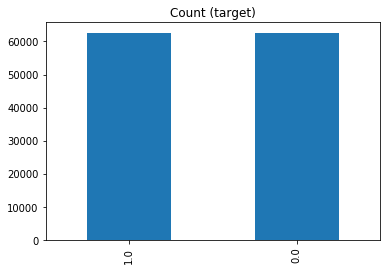

In [57]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under.caudal_extremo.value_counts())

df_under.caudal_extremo.value_counts().plot(kind='bar', title='Count (target)');

In [58]:
df_under

,caudal,precip_promedio,temp_max_promedio,caudal_q95,precip_q95,temp_q95,caudal_mean_roll,precip_mean_roll,temp_mean_roll,caudal_std_roll,precip_std_roll,temp_std_roll,caudal_extremo_mean_roll,precip_extremo_mean_roll,temp_extremo_mean_roll,caudal_extremo
895514,10.500,0.0,25.500000,39.1900,9.950000,30.000000,11.3320,1.900000e+00,22.750000,2.583950,3.689969e+00,3.973873,0.200000,0.166667,0.000000,0.0
255581,26.600,0.0,29.333334,30.6000,0.000000,32.799999,24.7900,5.684342e-15,30.120000,2.199722,0.000000e+00,1.294929,0.366667,0.033333,0.100000,0.0
195568,0.001,0.0,29.333334,4.0010,0.000000,31.350834,0.0010,8.437695e-15,29.196667,0.000001,5.256636e-07,1.496618,0.000000,0.033333,0.033333,0.0
127208,1.090,0.0,18.469999,1.5785,0.093021,21.126183,3.1480,1.066500e+00,18.791454,1.516903,1.426338e+00,0.513395,0.800000,0.233333,0.000000,0.0
240884,7.970,0.0,30.799999,15.1000,0.000000,32.799999,9.2490,3.552714e-15,31.340000,0.890461,0.000000e+00,1.401745,0.000000,0.000000,0.066667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256188,5.830,7.8,5.800000,4.5185,6.685000,14.485000,5.4459,4.980000e+00,6.530000,3.982588,5.966350e+00,1.526834,0.200000,0.166667,0.066667,1.0
1256189,5.870,1.4,3.700000,4.5185,6.685000,14.485000,5.9809,5.120000e+00,6.400000,3.587048,5.851837e+00,1.715291,0.233333,0.166667,0.066667,1.0
1256190,5.560,0.4,7.400000,4.5185,6.685000,14.485000,6.5013,5.150000e+00,6.540000,3.011676,5.823945e+00,1.736024,0.266667,0.166667,0.066667,1.0
1256193,4.510,9.2,5.800000,4.5185,6.685000,14.485000,6.2520,3.480000e+00,6.670000,1.668291,4.715883e+00,1.886826,0.300000,0.200000,0.066667,1.0


Ahora, 'barajamos' aleatoreamente las filas del dataset.

In [60]:
df = df_under.sample(frac=1)
df

,caudal,precip_promedio,temp_max_promedio,caudal_q95,precip_q95,temp_q95,caudal_mean_roll,precip_mean_roll,temp_mean_roll,caudal_std_roll,precip_std_roll,temp_std_roll,caudal_extremo_mean_roll,precip_extremo_mean_roll,temp_extremo_mean_roll,caudal_extremo
39945,0.158,0.0,14.650000,0.155,0.000000,19.716667,0.0942,1.474376e-14,12.058333,0.045092,0.000000e+00,2.405540,0.133333,0.000000,0.066667,1.0
488376,79.800,0.0,24.299999,34.900,7.428928,27.500000,78.9300,2.842171e-15,25.720000,14.731225,0.000000e+00,5.509548,0.400000,0.100000,0.300000,1.0
715754,151.000,0.0,13.550000,640.200,30.994747,20.600000,461.5000,1.253936e+01,14.720000,428.981028,2.536777e+01,3.319237,0.166667,0.033333,0.100000,0.0
207535,2.650,0.0,30.750000,1.262,0.000000,33.000000,2.3250,9.972578e-15,29.115000,0.222274,4.945322e-07,1.446845,1.000000,0.000000,0.000000,1.0
516073,127.000,0.0,24.700001,81.500,0.017708,29.799999,128.0000,5.706546e-15,29.375000,4.027682,0.000000e+00,1.999340,0.933333,0.033333,0.200000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808854,247.000,0.0,17.600000,965.000,28.578702,19.700001,220.2000,2.810000e+00,17.500000,102.250020,6.678307e+00,3.433495,0.000000,0.000000,0.166667,0.0
286511,2.970,0.0,22.549999,7.998,0.136769,28.680000,3.0260,3.097522e-15,22.216666,0.422748,0.000000e+00,0.538344,0.000000,0.033333,0.000000,0.0
1239308,443.000,0.0,15.850000,697.350,7.445357,18.983334,436.5000,5.000000e-02,14.201667,48.749359,1.054093e-01,1.861392,0.000000,0.033333,0.033333,0.0
704657,42.900,51.0,15.400000,24.870,32.592499,26.299999,4.7593,1.065000e+01,16.790000,13.407103,1.883597e+01,2.798988,0.033333,0.066667,0.033333,1.0


In [61]:
split_idx = 100187

X = df.copy(deep=True)
X.drop(columns='caudal_extremo', inplace=True)

y = df['caudal_extremo']

In [62]:
X_train = X.iloc[:split_idx].values
X_test = X.iloc[split_idx:].values
y_train = y[:split_idx].values
y_test = y[split_idx:].values

Nos aseguramos que las dimensiones de los datasets son correctas.

In [63]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

print(X_train.shape[0] + X_test.shape[0] == X.shape[0])
print(y_train.shape[0] + y_test.shape[0] == y.shape[0])

X_train.shape:  (100187, 15)
X_test.shape:  (25047, 15)
y_train.shape:  (100187,)
y_test.shape:  (25047,)
True
True


Procedemos a escalar nuestra matrix X para que la tarea de entrenamiento sea mas precisa.

In [64]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler().fit(X_train)
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

Usamos un modelo de regresión logística, que sirve como clasificador y además predice las probabilidades de cada clase.

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, \
                            f1_score, accuracy_score, roc_auc_score, classification_report

# Instanciar, entrenar y predecir
lr = LogisticRegression(solver='lbfgs', random_state=123)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# Imprimir métricas de evaluación
print("Matriz confusion:\n {}".format(confusion_matrix(y_test, y_pred)))
print("\nAccuracy: {}".format(accuracy_score(y_test, y_pred)))
print("Precision: {}".format(precision_score(y_test, y_pred)))
print("Recall: {}".format(recall_score(y_test, y_pred)))
print("ROC-AUC: {}".format(roc_auc_score(y_test, y_pred)))
print("F1: {}".format(f1_score(y_test,y_pred)))

Matriz confusion:
 [[11663   890]
 [ 1783 10711]]

Accuracy: 0.8932806324110671
Precision: 0.923282475648651
Recall: 0.8572914999199616
ROC-AUC: 0.8931960566595746
F1: 0.8890641211869682


Revisamos las probabilidades predecidas por el modelo.

In [70]:
y_pred_probs = lr.predict_proba(X_test)[:,1]
print("Nro. de probabilidades > 0.5 (caudales extremos): ", (y_pred_probs >= 0.5).sum())
print("Total de datos en el testset: ", len(y_pred_probs))

Nro. de probabilidades > 0.5 (caudales extremos):  11601
Total de datos en el testset:  25047


In [71]:
print('Accuracy en test set: {:.3f}'.format(lr.score(X_test, y_test)))

Accuracy en test set: 0.893


In [72]:
print("Classification report:")
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     12553
         1.0       0.92      0.86      0.89     12494

    accuracy                           0.89     25047
   macro avg       0.90      0.89      0.89     25047
weighted avg       0.90      0.89      0.89     25047



## Pregunta 8.

**Análisis de resultado del modelo**

**a. Qué performance tiene el modelo? Qué métricas usaste para medir esa performance?
Cuáles son las variables más importantes? Qué opinión te merecen los resultados?**

El modelo tiene una 'accuracy' de clasificación de un 89%. Las métricas relevantes son precision y recall. Precision mide la probabilidad de clasificar un evento como de caudal extremo sobre un evento entrante cualquiera (podría ser un evento extremo o no). Recall nos da la proporción de clasificar un evento como extremo dado que ese evento era realmente extremo. La misma definición es aplicable vice versa en cuanto a clasificar eventos no extremos. Estas métricas se ven a continuación.

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     12553
         1.0       0.92      0.86      0.89     12494

    accuracy                           0.89     25047
   macro avg       0.90      0.89      0.89     25047
weighted avg       0.90      0.89      0.89     25047



Los resultados me parecen que pueden ser mejorados en el contexto de que es mejor predecir un evento de caudal extremo y que no suceda, a que esta no sea predecido y suceda. Esto significa mejorar el recall, ya que no quiero tener mucho falsos negativos. Recordar que recall se calcula: 

$$ Recall: \frac{True Positives}{True Positives + False Negatives}$$

En este caso, tenemos 1783 falsos negativos que pueden ser mejorados (disminuidos).

In [75]:
print("Matriz confusion:\n {}".format(confusion_matrix(y_test, y_pred)))

Matriz confusion:
 [[11663   890]
 [ 1783 10711]]


Las variables más importantes se pueden obtener mediante una clasificación con Random Forests.

In [76]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20 ,criterion='entropy', random_state=42)
rfc.fit(X_train, y_train)

print('Accuracy en training set: {:.3f}'.format(rfc.score(X_train, y_train)))
print('Accuracy en test set: {:.3f}'.format(rfc.score(X_test, y_test)))

Accuracy en training set: 0.999
Accuracy en test set: 0.939


Obtenemos de esta clasificación las 10 variables más relevantes.

In [77]:
importances = rfc.feature_importances_
importances_df = pd.DataFrame(importances, index=X.columns, columns=["Importance"])
print("Top 10 variables relevantes de un clasificador Random Forest (20 árboles): ")
importances_df.sort_values('Importance', ascending=False)[:10]

Top 10 variables relevantes de un clasificador Random Forest (20 árboles): 


,Importance
caudal_extremo_mean_roll,0.348565
caudal,0.100442
caudal_q95,0.087859
caudal_mean_roll,0.060736
precip_mean_roll,0.056485
precip_q95,0.052988
precip_promedio,0.051104
caudal_std_roll,0.047284
precip_std_roll,0.037633
temp_q95,0.032905



**b. Si quisiéramos capturar alrededor de un 70% de los eventos de caudales extremos.
Cuál es la precisión de tu modelo con ese porcentaje de captura? Cuéntanos si te
parece útil.**

Eso significaría tener una True Positive Rate de 70%. Ploteamos la curva ROC.

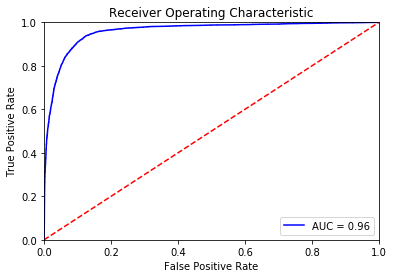

In [85]:
import sklearn.metrics as metrics

preds = y_pred_probs
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [92]:
tpr[tpr >= 0.7]
np.where(tpr >= 0.7)

(array([ 729,  730,  731, ..., 3666, 3667, 3668]),)

In [93]:
fpr[729]

0.030590297140125865

Eso significaría un False Positive Rate de 30% aprox., lo que quiere decir que de cada 10 eventos no extremos, estimaríamos 3 como extremos. Corresponderían a un 30% de falsas alarmas de desborde de caudal.

### Fin del notebook.